In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## TESTING the CAPACITANCE METHOD

## Loading the Dataset

In [2]:

parent_directory = './dataset\HAM10000_images_part_1'


# Use glob to get all image file paths in all subdirectories
imgPath = glob.glob(os.path.join(parent_directory, '**', '*.jpg'), recursive=True)  # You can adjust the file type


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\1814168735.py:1: SyntaxWarning: invalid escape sequence '\H'
  parent_directory = './dataset\HAM10000_images_part_1'


## Feature Extraction

In [3]:
import cv2
import numpy as np

def hydration_values(img):
    image = cv2.imread(img, 0)  # Load as grayscale

    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    norm_image = cv2.normalize(blurred_image, None, 0, 255, cv2.NORM_MINMAX)

    _, threshold_image = cv2.threshold(norm_image, 128, 255, cv2.THRESH_BINARY)

# Calculate the moisture distribution by analyzing pixel intensities
    hydrated_area = np.sum(threshold_image == 255)
    non_hydrated_area = np.sum(threshold_image == 0)
    total_area = hydrated_area + non_hydrated_area

# Output moisture content as percentage
    
    hydration_level = (hydrated_area / total_area) * 100
    return hydration_level 


hydration = []


for img in imgPath :
    hydration.append(hydration_values(img))



In [4]:
import pandas as pd 

df  =pd.DataFrame(hydration)


In [5]:
test = [] 
for i in imgPath:
    test.append(i.replace('./dataset\\HAM10000_images_part_1\\',""))
    

In [6]:
df['image_name'] = test
df= df.set_index('image_name')
df.columns = ['hydration']

In [7]:
df.to_csv('Cap1.csv')

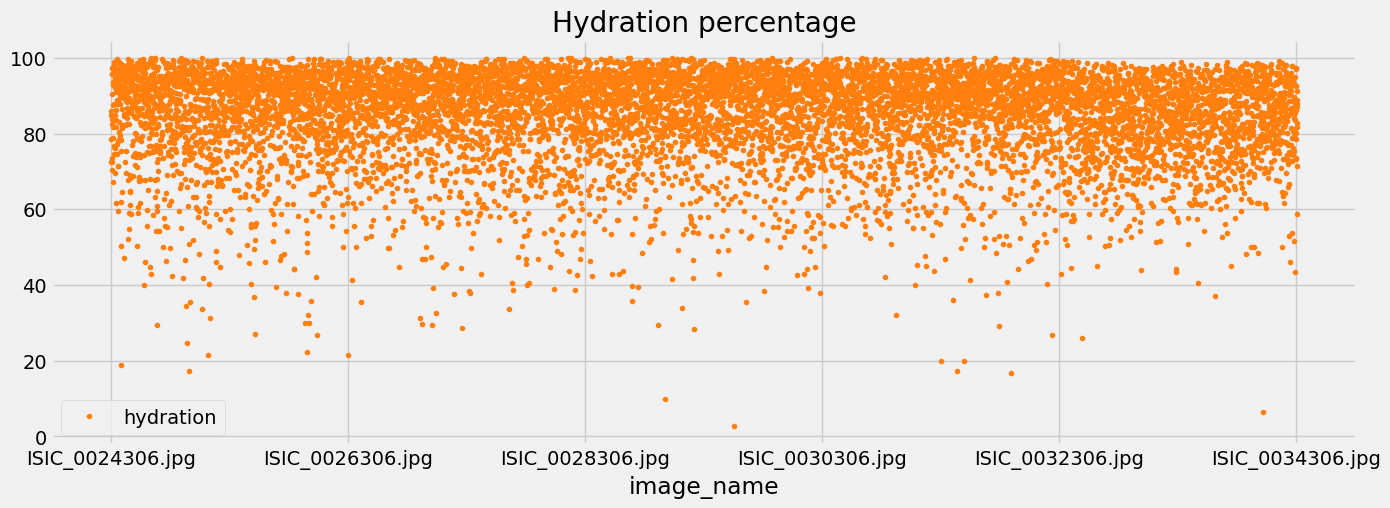

In [21]:
df.plot(
    style='.',
    figsize=(15,5),
    color =color_pal[1],
    title='Hydration percentage'
)
plt.show()

<Axes: ylabel='Frequency'>

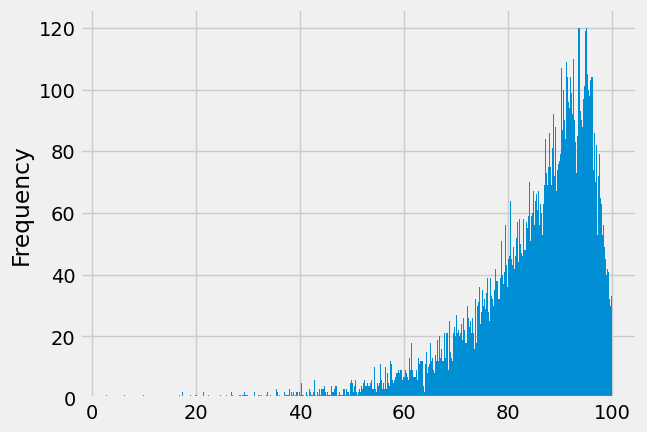

In [9]:
df['hydration'].plot(kind='hist',bins =500)

## Using Heat Map

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\1122573205.py:6: SyntaxWarning: invalid escape sequence '\M'
  img = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)


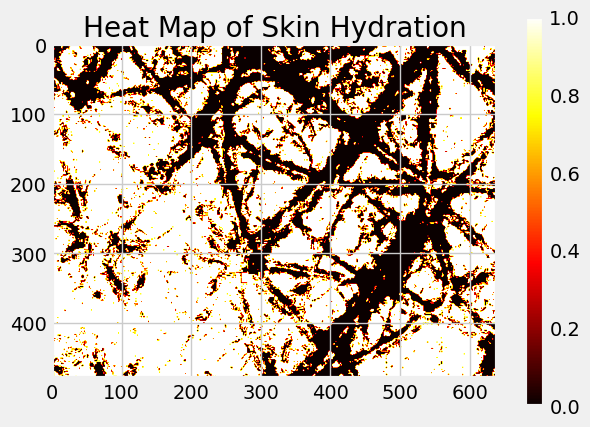

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale (or color if you prefer)
img = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)

# Normalize pixel values to range [0, 1]
img_normalized = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)

# Display the image as a heatmap
plt.imshow(img_normalized, cmap='hot')
plt.colorbar()
plt.title('Heat Map of Skin Hydration')
plt.show()


Mean Intensity: 0.6382389322916666
Standard Deviation: 0.4805101430759397


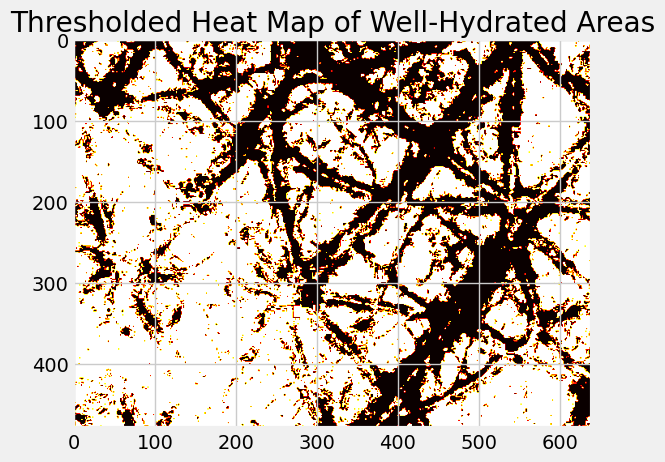

In [16]:
# Calculate mean and standard deviation of pixel intensities
mean_intensity = np.mean(img_normalized)
std_intensity = np.std(img_normalized)

print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_intensity}")
# Apply thresholding to identify well-hydrated areas
_, thresholded = cv2.threshold(img_normalized, 0.6, 1, cv2.THRESH_BINARY)

# Show thresholded areas as heatmap
plt.imshow(thresholded, cmap='hot')
plt.title('Thresholded Heat Map of Well-Hydrated Areas')
plt.show()


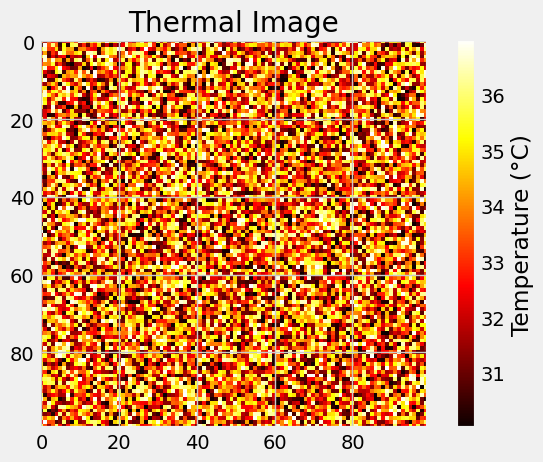

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated thermal image data (in Celsius)
thermal_image = np.random.uniform(low=30, high=37, size=(100, 100))  # 100x100 image with random temperatures

# Display the thermal image
plt.imshow(thermal_image, cmap='hot')
plt.colorbar(label="Temperature (°C)")
plt.title("Thermal Image")
plt.show()


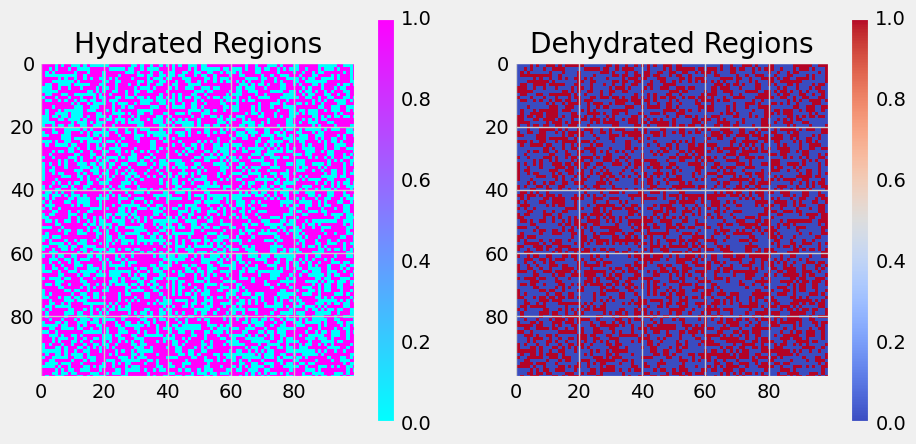

In [28]:
# Define temperature thresholds
hydrated_threshold = 33.0  # Hydrated if temperature is above 33°C
# Create masks for hydrated and dehydrated areas
hydrated_mask = thermal_image > hydrated_threshold  # Pixels where temperature > 33°C
dehydrated_mask = thermal_image <= hydrated_threshold  # Pixels where temperature <= 33°C

# Plot hydrated and dehydrated areas
plt.figure(figsize=(10, 5))

# Hydrated areas
plt.subplot(1, 2, 1)
plt.imshow(hydrated_mask, cmap='cool')
plt.title('Hydrated Regions')
plt.colorbar()

# Dehydrated areas
plt.subplot(1, 2, 2)
plt.imshow(dehydrated_mask, cmap='coolwarm')
plt.title('Dehydrated Regions')
plt.colorbar()

plt.show()


In [30]:
# Total number of pixels in the image
total_pixels = thermal_image.size

# Number of hydrated pixels
hydrated_pixels = np.sum(hydrated_mask)

# Calculate hydration percentage
hydration_percentage = (hydrated_pixels / total_pixels) * 100

print(f"Hydration Percentage: {hydration_percentage:.2f}%")


Hydration Percentage: 56.69%


<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_25884\4019020347.py:7: SyntaxWarning: invalid escape sequence '\M'
  thermal_image_path = 'Volunteers Data\MADAM REHANA\hand (after 35 days).jpg'  # Thermal image input


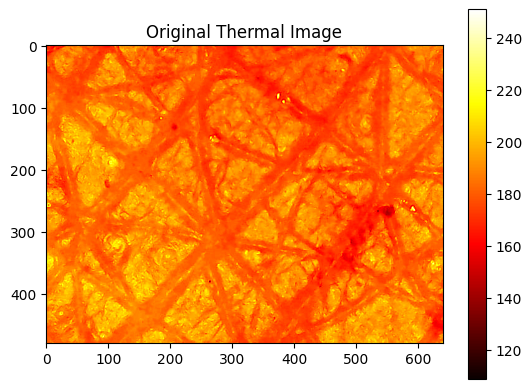

Average temperature in hot region: 197.31


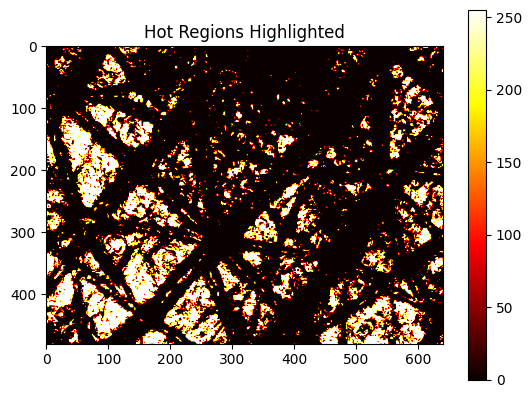

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a sample thermal image (or simulated thermal image in grayscale)
# Replace this with the path to your actual thermal image
thermal_image_path = 'Volunteers Data\MADAM REHANA\hand (after 35 days).jpg'  # Thermal image input
thermal_img = cv2.imread(thermal_image_path, cv2.IMREAD_GRAYSCALE)

# Display the original thermal image
plt.figure()
plt.imshow(thermal_img, cmap='hot')
plt.title('Original Thermal Image')
plt.colorbar()
plt.show()

def analyze_temperature_variation(image):
    """
    Analyzes the thermal image by extracting regions of interest (ROI)
    and calculating temperature variation across the image.
    
    :param image: Grayscale thermal image.
    :return: Normalized heat distribution (temperature).
    """
    # Normalize the pixel values (assuming pixel intensity represents temperature)
    normalized_img = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Thresholding the image to focus on higher temperature areas
    _, thresh_img = cv2.threshold(normalized_img, 150, 255, cv2.THRESH_BINARY)
    
    # Find contours of the hot regions
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask to draw the hot regions
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Calculate average temperature in the hot region
    hot_region = cv2.bitwise_and(image, image, mask=mask)
    avg_temp_hot_region = np.mean(hot_region[hot_region > 0])  # Calculate average of non-zero regions
    
    print(f"Average temperature in hot region: {avg_temp_hot_region:.2f}")
    
    return normalized_img, thresh_img, avg_temp_hot_region

# Analyze the temperature variation
normalized_img, thresh_img, avg_temp_hot_region = analyze_temperature_variation(thermal_img)

# Display the thresholded image highlighting hot regions
plt.figure()
plt.imshow(thresh_img, cmap='hot')
plt.title('Hot Regions Highlighted')
plt.colorbar()
plt.show()


## Optical Coherence Tomography (OCT) Non-invasive METHOD 

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_25884\1987420380.py:6: SyntaxWarning: invalid escape sequence '\M'
  image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)  # Load as grayscale


Stratum corneum thickness: 7 pixels


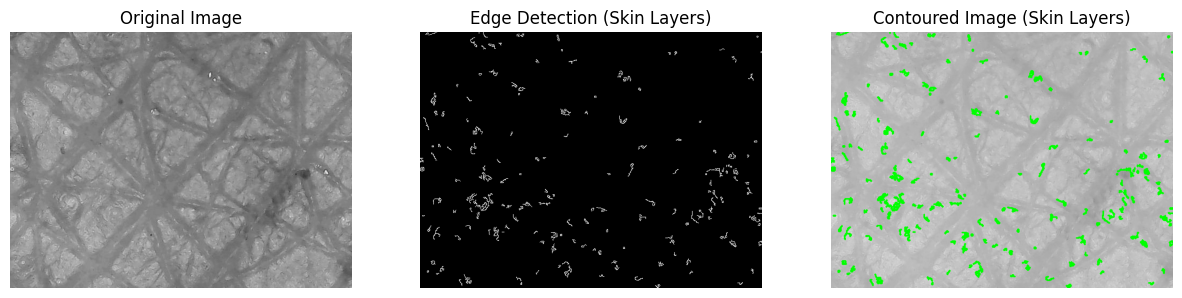

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the OCT image
image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)  # Load as grayscale

# Apply edge detection to find skin layers
edges = cv2.Canny(image, 50, 150)

# Find contours to isolate the stratum corneum layer
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image to visualize layers
contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

# Assuming the first contour represents the stratum corneum
# Calculate the thickness of the stratum corneum
if len(contours) > 0:
    x, y, w, h = cv2.boundingRect(contours[0])
    print(f'Stratum corneum thickness: {h} pixels')

# Display the original, edge-detected, and contoured images using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Show original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show edge detection result
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edge Detection (Skin Layers)')
ax[1].axis('off')

# Show contoured image
ax[2].imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Contoured Image (Skin Layers)')
ax[2].axis('off')

plt.show()


Normalized Intensity (Contour): 0.7556078431372549
Estimated Hydration Percentage (Contour): 24.44%


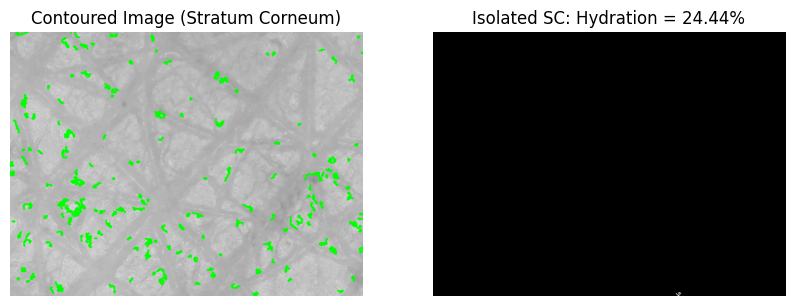

In [4]:
mask = np.zeros_like(image)  
cv2.drawContours(mask, contours, 0, (255), thickness=cv2.FILLED)  # Fill the first contour on the mask
roi_contoured = cv2.bitwise_and(image, mask)

non_zero_pixels = roi_contoured[roi_contoured > 0]  # Only consider non-zero pixels (inside the contour)
if len(non_zero_pixels) > 0:
    avg_intensity_contour = np.mean(non_zero_pixels)
    normalized_intensity_contour = avg_intensity_contour / 255.0  # Normalize to 0-1 range
    print(f'Normalized Intensity (Contour): {normalized_intensity_contour}')

    hydration_percentage_contour = (1 - normalized_intensity_contour) * 100  # Simple inverse correlation
    print(f'Estimated Hydration Percentage (Contour): {hydration_percentage_contour:.2f}%')

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Show original image with contour
ax[0].imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Contoured Image (Stratum Corneum)')
ax[0].axis('off')

# Show the isolated stratum corneum region
ax[1].imshow(roi_contoured, cmap='gray')
ax[1].set_title(f'Isolated SC: Hydration = {hydration_percentage_contour:.2f}%')
ax[1].axis('off')

plt.show()


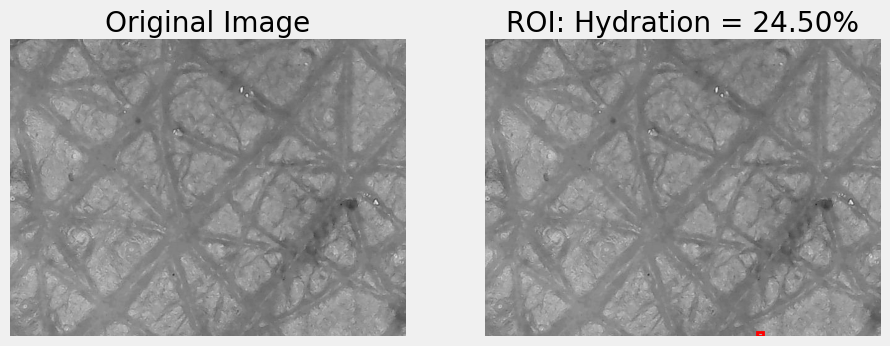

In [37]:
# Step 4: Visualize the region and hydration analysis
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show the original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Highlight the region of interest (Stratum Corneum)
ax[1].imshow(image, cmap='gray')
rect = plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2)
ax[1].add_patch(rect)
ax[1].set_title(f'ROI: Hydration = {hydration_percentage:.2f}%')
ax[1].axis('off')

plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\2969616891.py:2: SyntaxWarning: invalid escape sequence '\M'
  gray_image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', cv2.IMREAD_GRAYSCALE)


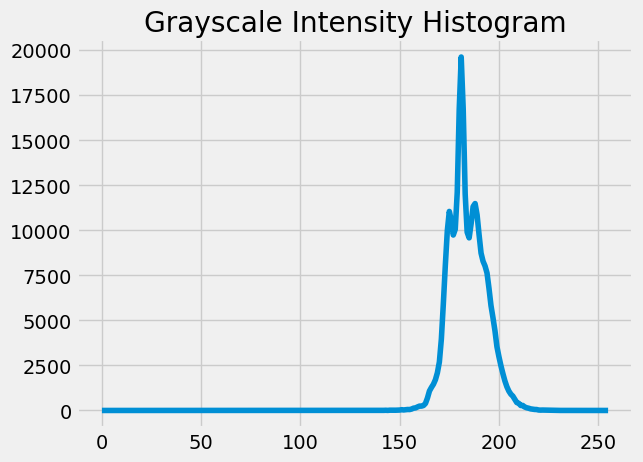

In [13]:
# Convert image to grayscale and analyze histogram (for depth and density simulation)
gray_image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histogram to simulate depth and intensity analysis
import matplotlib.pyplot as plt
plt.plot(hist)
plt.title('Grayscale Intensity Histogram')
plt.show()


##  Reflectance-Based Hydration Detection (Optical Imaging)

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\3006848119.py:6: SyntaxWarning: invalid escape sequence '\M'
  image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg')


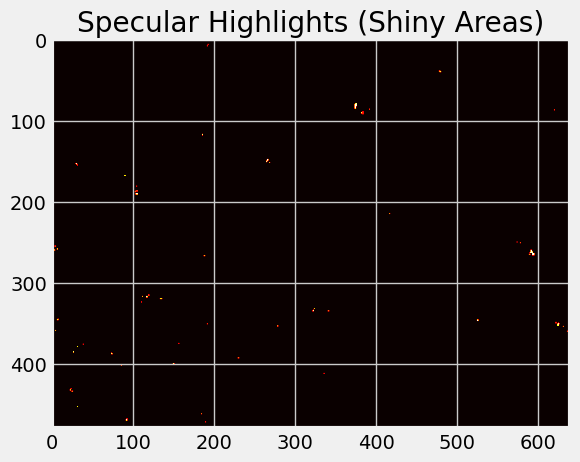

Proportion of shiny areas (likely hydrated): 0.05%


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg')

# Convert to grayscale for simplicity
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding to detect high-intensity areas (shiny parts)
_, shiny_areas = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)

# Display the shiny areas
plt.imshow(shiny_areas, cmap='hot')
plt.title('Specular Highlights (Shiny Areas)')
plt.show()

# Measure the proportion of shiny areas
shiny_proportion = np.sum(shiny_areas == 255) / shiny_areas.size
print(f"Proportion of shiny areas (likely hydrated): {shiny_proportion:.2%}")


<>:25: SyntaxWarning: invalid escape sequence '\M'
<>:25: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\322714839.py:25: SyntaxWarning: invalid escape sequence '\M'
  print(hydration_values('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg'))


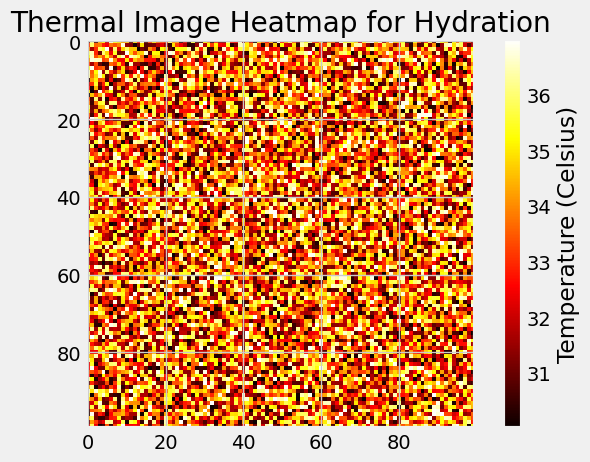

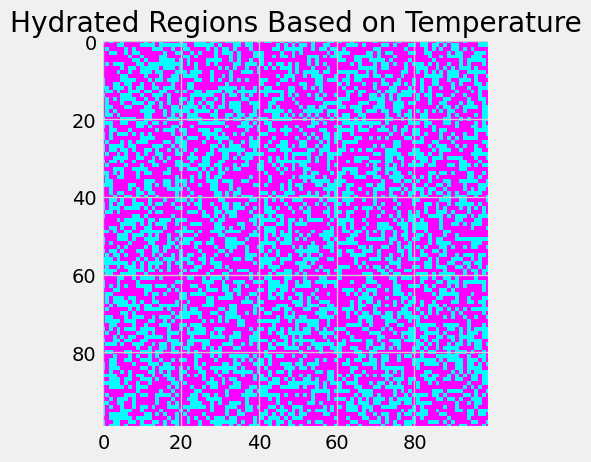

Hydrated Area Percentage: 56.43%
34.724609375


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated thermal image data
thermal_data = np.random.uniform(low=30, high=37, size=(100, 100))  # Temperatures in Celsius

# Display the thermal image as a heatmap
plt.imshow(thermal_data, cmap='hot')
plt.colorbar(label="Temperature (Celsius)")
plt.title("Thermal Image Heatmap for Hydration")
plt.show()

# Threshold to identify well-hydrated regions (temperature > 33C)
hydrated_areas = thermal_data > 33

# Show hydrated areas
plt.imshow(hydrated_areas, cmap='cool')
plt.title("Hydrated Regions Based on Temperature")
plt.show()

# Calculate percentage of hydrated areas
hydrated_percentage = np.sum(hydrated_areas) / hydrated_areas.size
print(f"Hydrated Area Percentage: {hydrated_percentage:.2%}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated thermal image data
thermal_data = np.random.uniform(low=30, high=37, size=(100, 100))  # Temperatures in Celsius


# Threshold to identify well-hydrated regions (temperature > 33C)
hydrated_areas = thermal_data > 33

# Calculate percentage of hydrated areas
hydrated_percentage = np.sum(hydrated_areas) / hydrated_areas.size


In [25]:
from skimage.feature import graycomatrix, graycoprops
import cv2

# Load the skin image
image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', cv2.IMREAD_GRAYSCALE)

# Calculate GLCM
glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Extract texture features
contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

print(f"Texture Contrast: {contrast}")
print(f"Texture Homogeneity: {homogeneity}")


<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\1472174981.py:5: SyntaxWarning: invalid escape sequence '\M'
  image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', cv2.IMREAD_GRAYSCALE)


Texture Contrast: 11.961577334376631
Texture Homogeneity: 0.43295053130141115
